# Predictive Maintenance for Large Servers

### First we will list all the inputs and downloads

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

### Next, we import and see if the dataset is fully loaded

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Predictive Maintenance for Large Servers/data.csv')
data.head()

,Sl. No.,Temperature,Pressure,Power,Vibration,Status
0,0,100,855,628,1.704471,Alert
1,1,87,695,1032,1.731366,Alert
2,2,80,945,837,0.221704,OK
3,3,78,1025,874,0.177159,OK
4,4,70,1040,887,0.199462,OK


### Pre-processing the data

In [ ]:
# Split the dataset into features (X) and the target variable (y)
X = data.drop(columns=["Sl. No.", "Status"])
y = data["Status"]

y = y.map({"OK": 0, "Alert": 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

### Plotting the data to get an idea

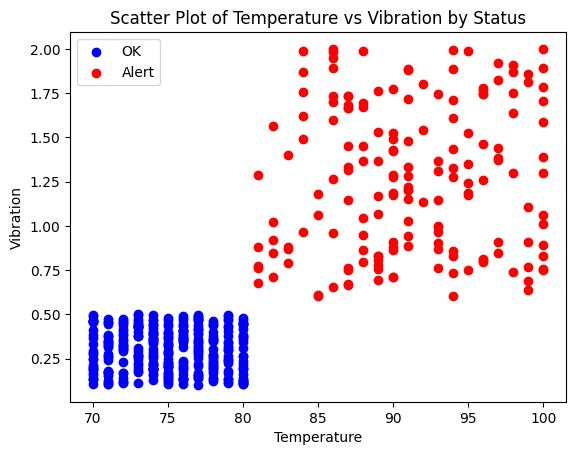

In [ ]:
plt.scatter(data[data["Status"] == "OK"]["Temperature"], data[data["Status"] == "OK"]["Vibration"], color='blue', label='OK')
plt.scatter(data[data["Status"] == "Alert"]["Temperature"], data[data["Status"] == "Alert"]["Vibration"], color='red', label='Alert')
plt.xlabel("Temperature")
plt.ylabel("Vibration")
plt.legend()
plt.title("Scatter Plot of Temperature vs Vibration by Status")
plt.show()

### Creating the prediction

In [ ]:
# Evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.97      0.98        32

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



The thresholds are:
1. Temperature: 70-80 degrees
2. Pressure: 900-1100 millibars
3. Power: 800-900 watts
4. Vibration: 0.1 - 0.5g

In [ ]:
# Precautionary
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Taking the new data
'''
Since the sensors are not available, we take the input for now to test.
'''

temp = int(input("Enter value of temperature: "))
pressure = int(input("Enter the value of pressure: "))
power = int(input("Enter the power: "))
vib = float(input("Enter the vibration: "))

new_data = [[temp, pressure, power, vib]]
new_prediction = model.predict(new_data)

print("Predicted Status:", "Alert" if new_prediction[0] == 1 else "OK")

Enter value of temperature: 100
Enter the value of pressure: 1200
Enter the power: 850
Enter the vibration: 0.3
Predicted Status: Alert
